# Lab-5 SVM:
In this lab, we will see an examples of how to use SVM for classification tasks

### Recap

1. What is SVM? Is it used for classification or regression?
    
2. Waht are Support Vectors?

3. What is a Hyperplane?

4. What is a Margin?

5. How does SVM work?


#### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


* We will first consider the simple case of a classification task, in which the two classes of points are **well** separated into two classes:

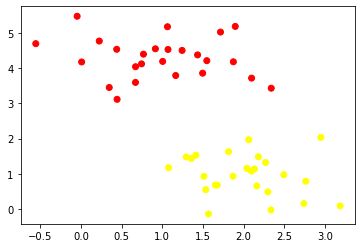

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn');

* We will draw three lines that can separate these two classe. Depending on which line you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to consider the **margin**.

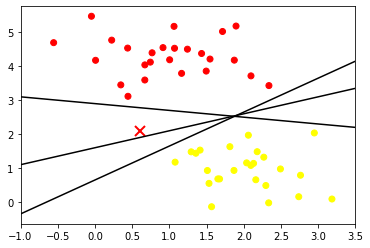

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

* We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

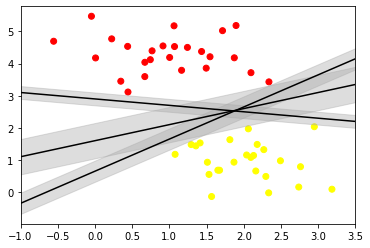

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);


### Support vector classifier
Fit a simple SVC for classifing the previous data

In [5]:
# Write your code here


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 ##### plot the svc decision function

The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  .𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗()  method of the SVC

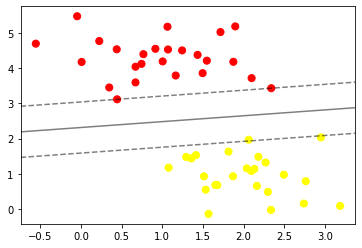

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [7]:
# get support vectors
# get indices of support vectors
# get number of support vectors for each class


Support vectors:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
indices of support vectors:  [18 25  7]
number of support vectors for each class:  [2 1]


* Let's see how the number of samples affect the svm model and it's margin

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], ax=fixed(None));

A Jupyter Widget

The  𝚌  argument allows us to specify the cost of a violation to the margin. When the  𝚌  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  𝚌  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best 𝚌  argument? 
<span style="color:blue"> Using cross validation
    
We will see how to use SVM for classifing images of hand-written digits.

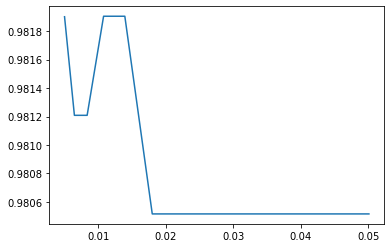

[0.9819018301140016, 0.981208348837996, 0.981208348837996, 0.9819052129494942, 0.9819052129494942, 0.9805148675619905, 0.9805148675619905, 0.9805148675619905, 0.9805148675619905, 0.9805148675619905]
0.0107977516232771


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits



X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
Cs = np.logspace(-2.3, -1.3, 10)
cv_scores = []
# Use cross_val_score for finding the bect c from Cs


plt.plot(Cs, cv_scores)
plt.show()
print(cv_scores)
print(Cs[np.argmax(cv_scores)])

* Print classification_report, confusion_matrix for the a model with the best c argument

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
# fit SVM model with the best c argument
#Print classification_report, confusion_matrix for the  model

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  1  0  2]
 [ 0  1  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  4  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        42
           5       1.00      0.92      0.96        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.93      0.96      0.95        28

    accuracy                           0.97       360
   macro avg       

* Let's use SVM for Iris dataset (Dataset of 3 types/classes of flowers with 4 features) classification and plot the decision boundaries between the classes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


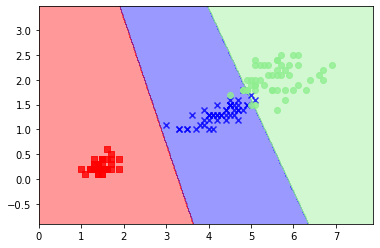

In [12]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
markers = ('s', 'x', 'o', '^', 'v')
svc = SVC(kernel='linear', C=0.00647)
svc.fit(X,y)
cmap = ListedColormap(colors[:len(np.unique(y))])
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z = svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
        
